# Check interpolation (python 2 vs 3)

In [1]:
# Set up the path to SModelS installation folder
import sys
sys.path.append("../")

In [2]:
from smodels.tools import runtime
from smodels.theory import decomposer
from smodels.tools.physicsUnits import fb, GeV, TeV
from smodels.theory.theoryPrediction import theoryPredictionsFor
from smodels.experiment.databaseObj import Database
from smodels.tools import coverage
from smodels.tools.smodelsLogging import setLogLevel
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels import particlesLoader
from imp import reload
from matplotlib import pyplot as plt
import numpy as np
setLogLevel("info")

### Mass point to be checked:

In [3]:
mass = [[258.276962119*GeV,92.7974884679*GeV]]*2

### Load the Database of experimental results built with python 2:

In [4]:
# Set the path to the database
databaseA = Database("unittest")
expA = databaseA.getExpResults(analysisIDs='ATLAS-SUSY-2013-12',txnames='TChiWZ')[0]
txA = expA.getTxNames()[0].txnameData
resA = txA.getValueFor(mass)
print('interpolation result (python 2) = ',resA)

INFO in databaseObj.loadBinaryFile() in 178: loading binary db file /home/lessa/.cache/smodels/unittest200rc9.pcl format version 213
INFO in databaseObj.loadBinaryFile() in 185: Loaded database from /home/lessa/.cache/smodels/unittest200rc9.pcl in 0.2 secs.
INFO in metaObj.printFastlimBanner() in 164: FastLim v1.1 efficiencies loaded. Please cite: arXiv:1402.0492, EPJC74 (2014) 11


interpolation result (python 2) =  2.24E+02 [fb]


### Load the Database of experimental results built with python 3:

In [5]:
# Set the path to the database
databaseB = Database("./database")
expB = databaseB.getExpResults(analysisIDs='ATLAS-SUSY-2013-12',txnames='TChiWZ')[0]
txB = expB.getTxNames()[0].txnameData
resB = txB.getValueFor(mass)
print('interpolation result (python 3) = ',resB)

INFO in databaseObj.loadBinaryFile() in 178: loading binary db file /home/lessa/smodels/test/database/db31.pcl format version 213
INFO in databaseObj.loadBinaryFile() in 185: Loaded database from /home/lessa/smodels/test/database/db31.pcl in 0.2 secs.


interpolation result (python 3) =  2.14E+02 [fb]


### Plot triangulation

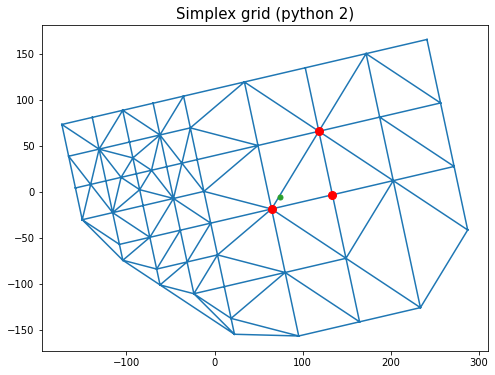

In [11]:
#Plot simplex grid:
plt.figure(figsize=(8,6))
plt.triplot(txA.tri.points[:,0], txA.tri.points[:,1], txA.tri.simplices.copy())

#Convert mass point to simplex coordinates:
pointA = txA.dataToCoordinates(mass,rotMatrix=txA._V,
                                  transVector=txA.delta_x)
pontA = pointA[:2] #reduce dimension

#Get simplex containing the point:
simplexA = txA.tri.find_simplex(pointA[:2], tol=1e-6)
#Get the list of vertices fro the simplex:
verticesA = txA.tri.simplices[simplexA]
#Get the points corresponding to the vertices:
simplexPointsA = np.array([txA.tri.points[iv] for iv in verticesA])

plt.plot(pointA[0],pointA[1],'o',markersize=5)
plt.plot(simplexPointsA[:,0],simplexPointsA[:,1],'o',markersize=8,color='red')
plt.title("Simplex grid (python 2)", fontsize=15)
plt.show()

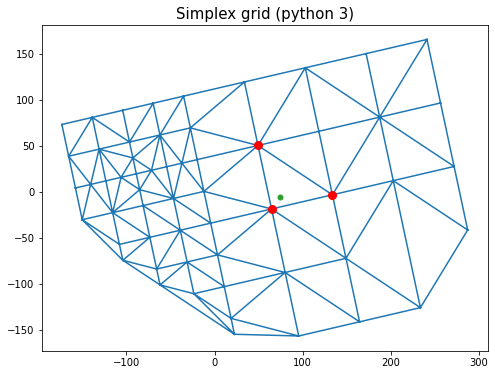

In [10]:
#Plot simplex grid:
plt.figure(figsize=(8,6))
plt.triplot(txB.tri.points[:,0], txB.tri.points[:,1], txB.tri.simplices.copy())

#Convert mass point to simplex coordinates:
pointB = txB.dataToCoordinates(mass,rotMatrix=txB._V,
                                  transVector=txB.delta_x)
pontB = pointB[:2] #reduce dimension

#Get simplex containing the point:
simplexB = txB.tri.find_simplex(pointB[:2], tol=1e-6)
#Get the list of vertices fro the simplex:
verticesB = txB.tri.simplices[simplexB]
#Get the points corresponding to the vertices:

simplexPointsB = np.array([txB.tri.points[iv] for iv in verticesB])
plt.plot(pointB[0],pointB[1],'o',markersize=5)
plt.plot(simplexPointsB[:,0],simplexPointsB[:,1],'o',markersize=8,color='red')
plt.title("Simplex grid (python 3)",fontsize=15)
plt.show()